# The lessons of module 9: Vectors and Matrix

## lesson 4

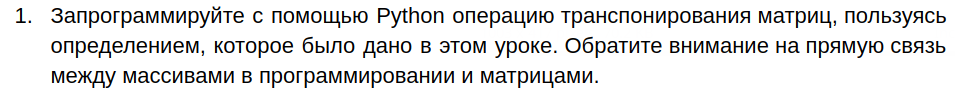

In [1]:
class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix
        self.row = len(matrix)

    def __repr__(self):
        return ''.join([f"\n{vector}" for vector in [i for i in self.matrix]])

    def __str__(self):
        return ''.join([f"\n{vector}" for vector in [i for i in self.matrix]])
    def transposition(self):
        after_transposition = [[] for elem in range(len(self.matrix[0]))]
        for i_v, vector in enumerate(self.matrix):
            for i_e, element in enumerate(vector):
                after_transposition[i_e].append(element)
        self.matrix = after_transposition

In [2]:
A = Matrix([[1, 3, 5],
            [4, 5, 6],
            [7, 8, 9]])
print(f'before transposition: {A}')
A.transposition()
print(f'after transposition: {A}')
A.transposition()
print(f'double transposition: {A}')

before transposition: 
[1, 3, 5]
[4, 5, 6]
[7, 8, 9]
after transposition: 
[1, 4, 7]
[3, 5, 8]
[5, 6, 9]
double transposition: 
[1, 3, 5]
[4, 5, 6]
[7, 8, 9]


In [3]:
C = Matrix([[1, 2]])
C.transposition()
C.transposition()
C


[1, 2]

In [4]:
B = Matrix([[1, 3, 5],
            [4, 5, 6]])
print(f'before transposition: {B}')
B.transposition()
print(f'after transposition: {B}')
B.transposition()
print(f'double transposition: {B}')

before transposition: 
[1, 3, 5]
[4, 5, 6]
after transposition: 
[1, 4]
[3, 5]
[5, 6]
double transposition: 
[1, 3, 5]
[4, 5, 6]


In [5]:
A


[1, 3, 5]
[4, 5, 6]
[7, 8, 9]

In [6]:
# check class Matrix with help a np.array

import numpy as np

list_np = np.array([[1, 2, 3],
                    [4, 5, 6]])
list_np

array([[1, 2, 3],
       [4, 5, 6]])

## lesson 9.5 and homework lesson 9.6

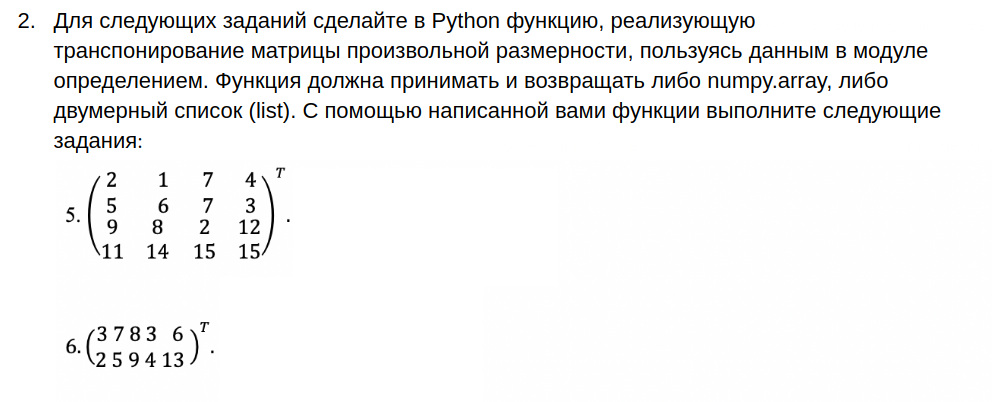

In [7]:
N = Matrix(list_np)
N.transposition()
N


[1, 4]
[2, 5]
[3, 6]

In [8]:
A5 = Matrix([[2, 1, 7, 4],
             [5, 6, 7, 3],
             [9, 8, 2, 12],
             [11, 14, 15, 15]])
A5


[2, 1, 7, 4]
[5, 6, 7, 3]
[9, 8, 2, 12]
[11, 14, 15, 15]

In [9]:
A5.transposition()
A5
# everything is right


[2, 5, 9, 11]
[1, 6, 8, 14]
[7, 7, 2, 15]
[4, 3, 12, 15]

In [10]:
A6 = Matrix([[3, 7, 8, 3, 6],
            [2, 5, 9, 4, 13]])
A6


[3, 7, 8, 3, 6]
[2, 5, 9, 4, 13]

In [11]:
A6.transposition()
A6
# -everything is right


[3, 2]
[7, 5]
[8, 9]
[3, 4]
[6, 13]

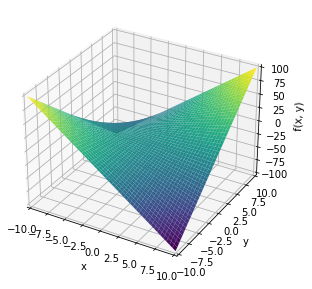

In [12]:
from sympy import *
from sympy.plotting import plot3d
x, y = symbols('x, y')
f = x * y
plot3d(f)

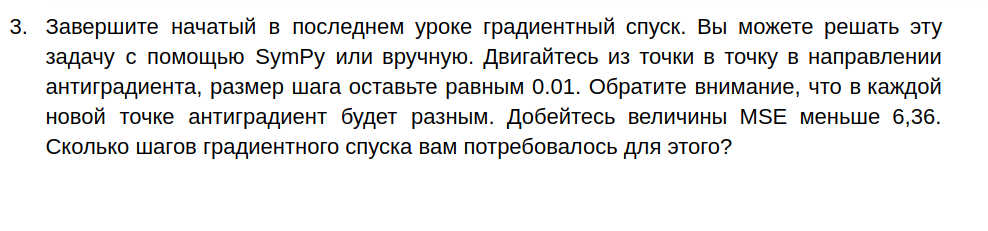

In [13]:
from sympy import *

a2, a1, a0 = symbols('a2, a1, a0')

MSE = 1/4 * (
(1*a1 + 2*a2 - 5)**2 + \
(5*a1 + 3*a2 - 6)**2 + \
(2*a1 + 4*a2 - 10)**2 + \
(3*a1 + 7*a2 - 8)**2
)
MSE

0.25*(a1 + 2*a2 - 5)**2 + 0.25*(2*a1 + 4*a2 - 10)**2 + 0.25*(3*a1 + 7*a2 - 8)**2 + 0.25*(5*a1 + 3*a2 - 6)**2

In [48]:
MSEa1 = 19.5 * a1 + 23*a2 - 39.5
MSEa1

In [49]:
MSEa2 = 23*a1 + 39* a2 - 62
MSEa2

In [50]:
MSE.subs({a1: 0, a2: 0})
# MSE in zero coeff is eqaul to 56.25

In [51]:
# find coefficients for check gradients in past

coefficients_min_loss = nonlinsolve([MSEa1,
                                    MSEa2],
                                   [a1, a2]).args[0]
coefficients_min_loss

In [52]:
#check MSE for found coeff min loss

MSE.subs({a1: coefficients_min_loss[0], a2: coefficients_min_loss[1]})
# MSE 6.2

In [53]:
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_unicode=False, wrap_line=False, no_global=True)

Do iteration for searching is 1 anti gradient
MSE 1: 16.8572437500000
Do iteration for searching is 2 anti gradient
MSE 2: 8.59365482859375
Do iteration for searching is 3 anti gradient
MSE 3: 6.85191449679269
Do iteration for searching is 4 anti gradient
MSE 4: 6.47725148826285
Do iteration for searching is 5 anti gradient
MSE 5: 6.38978037646670
Do iteration for searching is 6 anti gradient
MSE 6: 6.36322055427526
Do iteration for searching is 7 anti gradient
MSE 7: 6.35010849011797


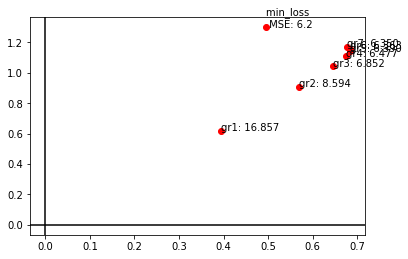

In [77]:
def find_gradient(a1_, a2_, type_gradient='P', step=1/100):
    a1_gradient = MSEa1.subs({a1: a1_, a2: a2_}) * step
    a2_gradient = MSEa2.subs({a1: a1_, a2: a2_}) * step
    if type_gradient == 'P':
        return {a1: a1_ + a1_gradient, a2: a2_ + a2_gradient}
    elif type_gradient == 'N':
        return {a1: a1_ + -a1_gradient, a2: a2_ + -a2_gradient}
    else:
        raise Exception(
            'Not fount type gradient. Function get variable type gradient such as the P or N')


fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
# min loss
ax.scatter([coefficients_min_loss[0]], [coefficients_min_loss[1]], c='r')
ax.annotate('min_loss \n MSE: 6.2',
            (coefficients_min_loss[0], coefficients_min_loss[1]))

lastgr = {a1:0, a2:0} 
for i in range(100):
    print(f'Do iteration for searching is {i+1} anti gradient')
    gr = find_gradient(lastgr[a1], lastgr[a2], 'N', 1/100)
    ax.scatter(gr[a1], gr[a2], c='r')
    mse_gr = MSE.subs(gr)
    print(f'MSE {i+1}: {mse_gr}')
    ax.annotate(f'gr{i+1}: {format(mse_gr, ".3f")}', (gr[a1], gr[a2])) 
    lastgr = gr
    if mse_gr < 6.36:
        break

Do iteration for searching is 1 anti gradient
MSE 1: 16.8572437500000
Do iteration for searching is 2 anti gradient
MSE 2: 8.59365482859375
Do iteration for searching is 3 anti gradient
MSE 3: 6.85191449679269
Do iteration for searching is 4 anti gradient
MSE 4: 6.47725148826285
Do iteration for searching is 5 anti gradient
MSE 5: 6.38978037646670
Do iteration for searching is 6 anti gradient
MSE 6: 6.36322055427526
Do iteration for searching is 7 anti gradient
MSE 7: 6.35010849011797


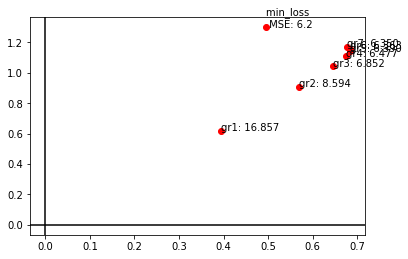

In [75]:
def find_gradient_n(coeff, type_gradient='P', step=1/100):
    gradient = np.array([MSEa1.subs({a1: coeff[0], a2: coeff[1]}),
                           MSEa2.subs({a1: coeff[0], a2: coeff[1]})]) * step
    if type_gradient == 'P':
        return coeff + gradient
    elif type_gradient == 'N':
        return coeff + -gradient
    else:
        raise Exception('Not fount type gradient. Function get variable type gradient such as the P or N')
        

fig, ax = plt.subplots()
ax.axhline(0, color='black')
ax.axvline(0, color='black')
# min loss
ax.scatter([coefficients_min_loss[0]], [coefficients_min_loss[1]], c='r')
ax.annotate('min_loss \n MSE: 6.2', (coefficients_min_loss[0], coefficients_min_loss[1]))

last_gr = np.array([0, 0])
for i in range(100):
    print(f'Do iteration for searching is {i+1} anti gradient')
    gr = find_gradient_n((last_gr), 'N', 1/100)
    ax.scatter(gr[0], gr[1], c='r')
    mse_gr = MSE.subs({a1:gr[0], a2:gr[1]})
    print(f'MSE {i+1}: {mse_gr}')
    ax.annotate(f'gr{i+1}: {format(mse_gr, ".3f")}', (gr[0], gr[1]))
    last_gr = gr
    if mse_gr < 6.36:
        break